# Take Home Test

In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = 50
import seaborn as sns
import matplotlib.pyplot as plt 

For this analysis, I'm using the data set `TakeHomeTest_Dataset.csv`. Let's import it to start exploring.

## 1. Data cleaning & exploration

In [2]:
data = pd.read_csv('Data/TakeHomeTest_Dataset.csv')

In [3]:
data.head(10)

,Recruiting_Dept,findept,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
0,EMEA,Engineering,10002 Software Engineering,Software Engineering,"Software Engineer IV, Full Stack - Compliance",Remy Maddox,Full-Time,EMEA,London - UK2,New Hire,287830544,265422657,2024,FY24Q2,2023-05-20,Amelia Jones,Tech,We rejected them,We rejected them: Job closed,rejected,P30,Company marketing,Jobs page on your website,2023-05-17,2023-06-25,NaN,NaN
1,Corp,G&A,60006 People Experience,People Experience,Senior Program Manager - People Operations,Zane Clarke,Full-Time,USA,Remote - WA,Conversion,315497043,275393151,2024,FY24Q3,2023-09-16,Dakota Davis,Non-Tech,NaN,NaN,accepted,P40,Company marketing,Jobs page on your website,2023-09-11,2023-09-17,2023-08-25,2023-09-11
2,Tech,Engineering,10003 Product,Product,"Manager, Competitor and Market Insights",Louisa Rose,Full-Time,USA,Remote - FL,New Hire,287872947,265464160,2024,FY24Q1,2023-04-15,Casey Garcia,GTM,NaN,NaN,accepted,P60,Third-party boards,LinkedIn (Ad Posting),2023-04-12,2023-04-30,2023-03-07,2023-04-12
3,Field Ops,Sales,20001 Sales,Inside Sales,Account Executive II - Mexico,Bexley Holloway,Full-Time,LATAM,Remote - Mexico,New Hire,321260973,296007519,2024,FY24Q4,2023-11-04,Alex Smith,GTM,NaN,NaN,accepted,S30,Prospecting,LinkedIn (Prospecting),2023-10-30,2023-11-26,2023-10-11,2023-10-30
4,Corp,G&A,60006 People Experience,People Experience,Senior Compensation Analyst,Ayleen Keith,Full-Time,USA,Remote - FL,New Hire,327190806,301693162,2024,FY24Q4,2023-11-25,Drew Jones,Non-Tech,NaN,NaN,accepted,P30,Prospecting,hireEZ,2023-11-21,2023-12-10,2023-10-12,2023-11-21
5,Tech,Engineering,10001 Hardware Engineering,Hardware Engineering,Senior Compliance Engineer,Kiana Shaffer,Full-Time,USA,Remote - SF Bay Area,New Hire,287541672,265136432,2024,FY24Q1,2023-04-22,Drew Garcia,Tech,NaN,NaN,accepted,P50,Company marketing,Growth - Linkedin InMail,2023-04-21,2023-05-14,2023-01-13,2023-04-21
6,Field Ops,Sales,20001 Sales,Inside Sales,Commercial Account Executive - US East [FY25 H...,Katherine Briggs,Full-Time,USA,Remote - TN,New Hire,324956267,292180321,2024,FY24Q3,2023-10-21,Alex Jones,GTM,NaN,NaN,accepted,S20,Referral,Referral,2023-10-19,2023-11-12,2023-09-15,2023-10-19
7,Corp,G&A,60004 Information Technology,Information Technology,Senior Technical Project Manager - GTMS,Deacon Castillo,Full-Time,USA,Remote - SF Bay Area,New Hire,279529063,256925983,2024,FY24Q1,2023-02-11,Drew Rodriguez,Tech,NaN,NaN,accepted,P50,Third-party boards,LinkedIn (Ad Posting),2023-02-09,2023-02-20,2023-01-11,2023-02-09
8,Field Ops,Sales,20001 Sales,Inside Sales,Account Executive II - Canada,Scarlett Ayala,Full-Time,CANADA,Remote - Canada,New Hire,313066595,287959014,2024,FY24Q3,2023-10-07,Charlie Miller,GTM,NaN,NaN,accepted,S30,Referral,Referral,2023-10-02,2023-10-29,2023-06-23,2023-10-02
9,Field Ops,Sales,20001 Sales,Sales Engineering,"Senior Manager, Sales Engineering - Partnerships",Jasiah Truong,Full-Time,USA,Remote - IL,New Hire,282119430,259802763,2024,FY24Q1,2023-04-08,Casey Smith,Tech,NaN,NaN,accepted,M60,Third-party boards,LinkedIn (Ad Posting),2023-04-07,2023-04-23,2023-01-12,2023-04-07


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Recruiting_Dept        1390 non-null   object
 1   findept                1390 non-null   object
 2   cost_center_parent     1390 non-null   object
 3   department             1390 non-null   object
 4   job_name               1390 non-null   object
 5   Candidate_Name         1390 non-null   object
 6   offer_employment_type  1390 non-null   object
 7   office_region          1389 non-null   object
 8   office_location        1390 non-null   object
 9   offer_change_reason    1390 non-null   object
 10  app_id                 1390 non-null   int64 
 11  candidate_id           1390 non-null   int64 
 12  Fiscal_Year            1390 non-null   int64 
 13  Fiscal_QuarterYr       1390 non-null   object
 14  Week_End_Date          1390 non-null   object
 15  candidate_recruiter  

In [5]:
# Check for duplicates
data.duplicated().value_counts()

False    1390
dtype: int64

### 1.1 Exploring individual columns

`cost_center_parent` seems to have two pieces of information, so let's split it into two columns. First, let's reviews which values does it have. 

In [6]:
data["cost_center_parent"].value_counts()

20001 Sales                          588
10002 Software Engineering           241
40001 Support                        121
30001 Marketing                       62
10001 Hardware Engineering            57
60004 Information Technology          55
60003 Accounting                      55
10003 Product                         44
60008 Recruiting                      33
60007 Finance                         29
20002 Sales Operations & Strategy     22
60006 People Experience               19
60005 Legal                           19
50001 Fulfillment Operations          10
50002 Supply Chain                     8
50003 Planning                         6
60009 Workplace                        5
20003 Sales Exec Admin                 3
50004 Global Ops Engineering           3
30002 Marketing Exec Admin             2
60011 Investor Relations               2
60010 Internal Audit                   2
60013 Tax                              2
60012 G&A Exec Admin                   2
Name: cost_cente

In [7]:
# cost_center_parent CODE
cost_center_parent_code = data["cost_center_parent"].str.split(" ", 1, expand=True)[0]

# cost_center_parent VALUES
cost_center_parent = data["cost_center_parent"].str.split(" ", 1, expand=True)[1]

# Insert new columns to dataset
data1 = data.copy()
data1.insert(2, "cost_center_parent_code", cost_center_parent_code)
data1["cost_center_parent"] = cost_center_parent
data1.head()

,Recruiting_Dept,findept,cost_center_parent_code,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
0,EMEA,Engineering,10002,Software Engineering,Software Engineering,"Software Engineer IV, Full Stack - Compliance",Remy Maddox,Full-Time,EMEA,London - UK2,New Hire,287830544,265422657,2024,FY24Q2,2023-05-20,Amelia Jones,Tech,We rejected them,We rejected them: Job closed,rejected,P30,Company marketing,Jobs page on your website,2023-05-17,2023-06-25,NaN,NaN
1,Corp,G&A,60006,People Experience,People Experience,Senior Program Manager - People Operations,Zane Clarke,Full-Time,USA,Remote - WA,Conversion,315497043,275393151,2024,FY24Q3,2023-09-16,Dakota Davis,Non-Tech,NaN,NaN,accepted,P40,Company marketing,Jobs page on your website,2023-09-11,2023-09-17,2023-08-25,2023-09-11
2,Tech,Engineering,10003,Product,Product,"Manager, Competitor and Market Insights",Louisa Rose,Full-Time,USA,Remote - FL,New Hire,287872947,265464160,2024,FY24Q1,2023-04-15,Casey Garcia,GTM,NaN,NaN,accepted,P60,Third-party boards,LinkedIn (Ad Posting),2023-04-12,2023-04-30,2023-03-07,2023-04-12
3,Field Ops,Sales,20001,Sales,Inside Sales,Account Executive II - Mexico,Bexley Holloway,Full-Time,LATAM,Remote - Mexico,New Hire,321260973,296007519,2024,FY24Q4,2023-11-04,Alex Smith,GTM,NaN,NaN,accepted,S30,Prospecting,LinkedIn (Prospecting),2023-10-30,2023-11-26,2023-10-11,2023-10-30
4,Corp,G&A,60006,People Experience,People Experience,Senior Compensation Analyst,Ayleen Keith,Full-Time,USA,Remote - FL,New Hire,327190806,301693162,2024,FY24Q4,2023-11-25,Drew Jones,Non-Tech,NaN,NaN,accepted,P30,Prospecting,hireEZ,2023-11-21,2023-12-10,2023-10-12,2023-11-21


Let's explore values for job_name

In [8]:
data1["job_name"].value_counts().head(50)

Software Engineering Intern                                 47
Technical Support Specialist                                41
Account Development Representative - EST/CST                40
[INTERNAL CYCLE ONLY] Commercial Account Executive          38
Account Development Representative - MST/PST                27
Software Engineer (New Grad)                                24
Account Executive II                                        22
Account Executive I                                         22
[INTERNAL CYCLE ONLY] Mid Market Account Executive          20
(New Grad Q2 Start) Account Development Representative      15
Technical Support Engineer I                                15
Firmware Engineering Intern                                 14
Account Executive II - Mexico                               12
Mid-Market Account Executive - US West [FY25 Hire Ahead]    12
[INTERNAL CYCLE ONLY] Enterprise Account Executive          11
(New Grad Q3 Start) Account Development Representative 

Let's explore values for `office_location`

In [9]:
data1["office_location"].value_counts().head(100)

Remote - Mexico         204
Remote - SF Bay Area    191
San Francisco - SF9     122
Remote - CA              95
London - UK2             82
                       ... 
Remote - Puerto Rico      1
Remote - LA               1
San Francisco - SF7       1
Remote - NM               1
San Francisco - SF8       1
Name: office_location, Length: 63, dtype: int64

`office_location` contains two separate pieces of information. Therefore, I'll split the field into two columns. 

In [10]:
# Create new copy of dataset
data2 = data1.copy()

# Create remote vs in-person column
remote_or_inperson = data1["office_location"].apply(lambda x: "Remote" if "Remote" in x else "In-person")

# Create location column
location = data1["office_location"].apply(lambda x: x.split("-")[1].strip() if "Remote" in x else x.split("-")[0].strip())

# Insert new columns to dataset
data2.insert(9, "office_location_", location)
data2.insert(10, "remote_or_inperson", remote_or_inperson)
data2.head()

,Recruiting_Dept,findept,cost_center_parent_code,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location_,remote_or_inperson,office_location,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
0,EMEA,Engineering,10002,Software Engineering,Software Engineering,"Software Engineer IV, Full Stack - Compliance",Remy Maddox,Full-Time,EMEA,London,In-person,London - UK2,New Hire,287830544,265422657,2024,FY24Q2,2023-05-20,Amelia Jones,Tech,We rejected them,We rejected them: Job closed,rejected,P30,Company marketing,Jobs page on your website,2023-05-17,2023-06-25,NaN,NaN
1,Corp,G&A,60006,People Experience,People Experience,Senior Program Manager - People Operations,Zane Clarke,Full-Time,USA,WA,Remote,Remote - WA,Conversion,315497043,275393151,2024,FY24Q3,2023-09-16,Dakota Davis,Non-Tech,NaN,NaN,accepted,P40,Company marketing,Jobs page on your website,2023-09-11,2023-09-17,2023-08-25,2023-09-11
2,Tech,Engineering,10003,Product,Product,"Manager, Competitor and Market Insights",Louisa Rose,Full-Time,USA,FL,Remote,Remote - FL,New Hire,287872947,265464160,2024,FY24Q1,2023-04-15,Casey Garcia,GTM,NaN,NaN,accepted,P60,Third-party boards,LinkedIn (Ad Posting),2023-04-12,2023-04-30,2023-03-07,2023-04-12
3,Field Ops,Sales,20001,Sales,Inside Sales,Account Executive II - Mexico,Bexley Holloway,Full-Time,LATAM,Mexico,Remote,Remote - Mexico,New Hire,321260973,296007519,2024,FY24Q4,2023-11-04,Alex Smith,GTM,NaN,NaN,accepted,S30,Prospecting,LinkedIn (Prospecting),2023-10-30,2023-11-26,2023-10-11,2023-10-30
4,Corp,G&A,60006,People Experience,People Experience,Senior Compensation Analyst,Ayleen Keith,Full-Time,USA,FL,Remote,Remote - FL,New Hire,327190806,301693162,2024,FY24Q4,2023-11-25,Drew Jones,Non-Tech,NaN,NaN,accepted,P30,Prospecting,hireEZ,2023-11-21,2023-12-10,2023-10-12,2023-11-21


I'll check to see if the cleaning was done correctly

In [11]:
data2[["office_location_", "remote_or_inperson", "office_location"]].head(50)

,office_location_,remote_or_inperson,office_location
0,London,In-person,London - UK2
1,WA,Remote,Remote - WA
2,FL,Remote,Remote - FL
3,Mexico,Remote,Remote - Mexico
4,FL,Remote,Remote - FL
5,SF Bay Area,Remote,Remote - SF Bay Area
6,TN,Remote,Remote - TN
7,SF Bay Area,Remote,Remote - SF Bay Area
8,Canada,Remote,Remote - Canada
9,IL,Remote,Remote - IL


The cleaning is correct, so I'll remove the original column:

In [12]:
data2.drop('office_location', axis=1, inplace=True)
data2.head()

,Recruiting_Dept,findept,cost_center_parent_code,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location_,remote_or_inperson,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
0,EMEA,Engineering,10002,Software Engineering,Software Engineering,"Software Engineer IV, Full Stack - Compliance",Remy Maddox,Full-Time,EMEA,London,In-person,New Hire,287830544,265422657,2024,FY24Q2,2023-05-20,Amelia Jones,Tech,We rejected them,We rejected them: Job closed,rejected,P30,Company marketing,Jobs page on your website,2023-05-17,2023-06-25,NaN,NaN
1,Corp,G&A,60006,People Experience,People Experience,Senior Program Manager - People Operations,Zane Clarke,Full-Time,USA,WA,Remote,Conversion,315497043,275393151,2024,FY24Q3,2023-09-16,Dakota Davis,Non-Tech,NaN,NaN,accepted,P40,Company marketing,Jobs page on your website,2023-09-11,2023-09-17,2023-08-25,2023-09-11
2,Tech,Engineering,10003,Product,Product,"Manager, Competitor and Market Insights",Louisa Rose,Full-Time,USA,FL,Remote,New Hire,287872947,265464160,2024,FY24Q1,2023-04-15,Casey Garcia,GTM,NaN,NaN,accepted,P60,Third-party boards,LinkedIn (Ad Posting),2023-04-12,2023-04-30,2023-03-07,2023-04-12
3,Field Ops,Sales,20001,Sales,Inside Sales,Account Executive II - Mexico,Bexley Holloway,Full-Time,LATAM,Mexico,Remote,New Hire,321260973,296007519,2024,FY24Q4,2023-11-04,Alex Smith,GTM,NaN,NaN,accepted,S30,Prospecting,LinkedIn (Prospecting),2023-10-30,2023-11-26,2023-10-11,2023-10-30
4,Corp,G&A,60006,People Experience,People Experience,Senior Compensation Analyst,Ayleen Keith,Full-Time,USA,FL,Remote,New Hire,327190806,301693162,2024,FY24Q4,2023-11-25,Drew Jones,Non-Tech,NaN,NaN,accepted,P30,Prospecting,hireEZ,2023-11-21,2023-12-10,2023-10-12,2023-11-21


In [13]:
data.isnull().sum()

Recruiting_Dept             0
findept                     0
cost_center_parent          0
department                  0
job_name                    0
Candidate_Name              0
offer_employment_type       0
office_region               1
office_location             0
offer_change_reason         0
app_id                      0
candidate_id                0
Fiscal_Year                 0
Fiscal_QuarterYr            0
Week_End_Date               0
candidate_recruiter         0
Role_Class                  0
rejection_type           1187
rejection_name           1187
offer_status                0
mgmt_level                 15
source_type                 1
source_name                 1
offer_resolved_date         0
offer_start_date            0
job_open_date             203
job_close_date            203
dtype: int64

Let's order the dataset to analyze the distribution of null values

I'll continue exploring other columns

In [14]:
data2["offer_change_reason"].value_counts()

New Hire             1107
Internal Transfer     210
Rehire                 50
Conversion             20
Promotion               3
Name: offer_change_reason, dtype: int64

In [15]:
data2["Fiscal_Year"].value_counts()

2024    1390
Name: Fiscal_Year, dtype: int64

In [16]:
data2["Fiscal_QuarterYr"].value_counts()

FY24Q1    428
FY24Q3    346
FY24Q2    343
FY24Q4    273
Name: Fiscal_QuarterYr, dtype: int64

`Fiscal_QuarterYr` has unnecesary information, so I'll clean it. 

In [17]:
data3 = data2.copy()
data3["Fiscal_QuarterYr"] = data3["Fiscal_QuarterYr"].str[-2:]
data3["Fiscal_QuarterYr"].head(10)

0    Q2
1    Q3
2    Q1
3    Q4
4    Q4
5    Q1
6    Q3
7    Q1
8    Q3
9    Q1
Name: Fiscal_QuarterYr, dtype: object

In [18]:
data3["candidate_recruiter"].value_counts()

Alex Brown           99
Casey Miller         84
Charlie Rodriguez    80
Jordan Miller        63
Dakota Davis         49
Drew Jones           49
Casey Williams       49
Drew Rodriguez       48
Alex Miller          44
Casey Smith          40
Charlie Miller       40
Alex Jones           40
Taylor Garcia        40
Hayden Williams      40
Taylor Rodriguez     40
Alex Smith           40
Morgan Miller        39
Drew Brown           39
Taylor Smith         39
Jordan Davis         36
Finley Brown         36
Drew Johnson         24
Hayden Rodriguez     24
Taylor Martinez      24
Finley Jones         24
Finley Williams      24
Morgan Davis         24
Drew Garcia          24
Casey Garcia         24
Isabella Brown       14
Harry Taylor         14
Jack Davies          14
Charlie Wilson       14
Amelia Jones         14
Jakub Nowak          14
Zofia Kowalska       14
Oliver Smith         14
Emily Thomas         13
Sophia Evans         13
Hayden Martinez       9
Dakota Jones          9
Jordan Johnson  

In [19]:
data3["Role_Class"].value_counts()

GTM         686
Tech        437
Non-Tech    267
Name: Role_Class, dtype: int64

In [20]:
data3["rejection_type"].value_counts(dropna=False)

NaN                 1187
They rejected us     151
We rejected them      52
Name: rejection_type, dtype: int64

In [21]:
data3["rejection_name"].value_counts(dropna=False)

NaN                                                       1187
They rejected us: Took another offer                        88
They rejected us: Candidate withdrew                        34
They rejected us: Compensation misalignment                 24
None specified: Other (add notes)                           24
We rejected them: Job closed                                 5
We rejected them: Compensation misalignment                  5
None specified: Duplicate                                    4
None specified: Moved to another role                        4
We rejected them: Hard skills insufficient                   4
They rejected us: Location Conflict                          3
They rejected us: Candidate was non-responsive               2
We rejected them: Does not meet education requirements       2
We rejected them: Soft skills insufficient                   2
We rejected them: Location conflict                          1
We rejected them: Future prospect                      

I'm curious as to how values that contain "None specified" are classified in the `rejection_type` field

In [22]:
data3[data3["rejection_name"].str.contains("None specified", na=False)].head(20)

,Recruiting_Dept,findept,cost_center_parent_code,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location_,remote_or_inperson,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
54,Field Ops,Sales,20001,Sales,Customer Success,Strategic Customer Success Manager,Roland Christian,Full-Time,USA,SF Bay Area,Remote,Internal Transfer,302462506,194614255,2024,Q2,2023-07-01,Casey Smith,GTM,We rejected them,None specified: Other (add notes),rejected,P40,Company marketing,Internal Applicant,2023-06-28,2023-07-29,NaN,NaN
100,Field Ops,Sales,20001,Sales,Inside Sales,Account Executive II - Canada,Talia Lowe,Full-Time,CANADA,Toronto,Remote,New Hire,259973457,238459889,2024,Q1,2023-03-11,Casey Williams,GTM,We rejected them,None specified: Duplicate,rejected,S30,Referral,Referral,2023-03-08,2023-03-26,NaN,NaN
128,Tech,Engineering,10002,Software Engineering,Software Engineering,Senior Firmware Quality Engineer - Video,Canaan Torres,Full-Time,USA,SF Bay Area,Remote,New Hire,305260059,263593191,2024,Q3,2023-09-16,Casey Garcia,Tech,We rejected them,None specified: Other (add notes),rejected,P50,Prospecting,LinkedIn (Prospecting),2023-09-13,2023-10-15,NaN,NaN
157,Tech,Engineering,10001,Hardware Engineering,Hardware Engineering,Senior Hardware Engineering Program Manager,Dalton Herring,Full-Time,USA,SF Bay Area,Remote,New Hire,286423866,116406628,2024,Q2,2023-05-06,Hayden Rodriguez,Tech,We rejected them,None specified: Other (add notes),rejected,P50,Prospecting,LinkedIn (Prospecting),2023-05-04,2023-12-03,NaN,NaN
189,Tech,Engineering,10001,Hardware Engineering,Hardware Engineering,Senior Compliance Engineer,Rebekah Townsend,Full-Time,USA,SF Bay Area,Remote,New Hire,282290009,176417661,2024,Q1,2023-02-11,Hayden Rodriguez,Tech,We rejected them,None specified: Duplicate,rejected,P30,Third-party boards,LinkedIn (Ad Posting),2023-02-05,2023-02-26,NaN,NaN
232,Tech,Engineering,10002,Software Engineering,Software Engineering,"Senior Software Engineer I, API Platform",Ava Luna,Full-Time,USA,NYC,Remote,New Hire,322917370,292777252,2024,Q3,2023-10-14,Taylor Martinez,Tech,We rejected them,None specified: Other (add notes),rejected,P40,Company marketing,Jobs page on your website,2023-10-11,2023-10-22,NaN,NaN
243,Emerging Talent,Engineering,10002,Software Engineering,Software Engineering,Firmware Engineering Intern,Drake Dougherty,Intern,USA,San Francisco,In-person,Rehire,314744408,241841235,2024,Q3,2023-09-02,Finley Brown,Tech,We rejected them,None specified: Moved to another role,rejected,P10,Other,Intern/Co-Op Conversion,2023-08-30,2024-05-19,NaN,NaN
244,Emerging Talent,Engineering,10001,Hardware Engineering,Hardware Engineering,Hardware Product Design Engineer Co-op,Cheyenne Hall,Intern,USA,San Francisco,In-person,New Hire,325861458,300548693,2024,Q4,2023-11-04,Jordan Davis,Tech,We rejected them,None specified: Other (add notes),rejected,P10,Prospecting,RippleMatch,2023-11-03,2024-06-23,NaN,NaN
257,Field Ops,Sales,20001,Sales,Customer Success,Strategic Customer Success Manager,Lyra Randall,Full-Time,USA,TX,Remote,Internal Transfer,302362579,277493349,2024,Q2,2023-07-01,Hayden Williams,GTM,We rejected them,None specified: Other (add notes),rejected,P40,Company marketing,Internal Applicant,2023-06-26,2023-07-29,NaN,NaN
412,Exec,Sales,20001,Sales,Customer Success,"VP, Customer Success",Luke Ortega,Full-Time,USA,San Francisco,In-person,Internal Transfer,274457713,88452388,2024,Q1,2023-03-04,Jordan Johnson,GTM,We rejected them,None specified: Other (add notes),rejected,M90,Company marketing,Internal Applicant,2023-02-27,2022-10-29,NaN,NaN


Aparently, they're classified as "We rejected them". For now, I'll keep it like this because I don't have much additional context. 

In [23]:
data3.head(5)

,Recruiting_Dept,findept,cost_center_parent_code,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location_,remote_or_inperson,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
0,EMEA,Engineering,10002,Software Engineering,Software Engineering,"Software Engineer IV, Full Stack - Compliance",Remy Maddox,Full-Time,EMEA,London,In-person,New Hire,287830544,265422657,2024,Q2,2023-05-20,Amelia Jones,Tech,We rejected them,We rejected them: Job closed,rejected,P30,Company marketing,Jobs page on your website,2023-05-17,2023-06-25,NaN,NaN
1,Corp,G&A,60006,People Experience,People Experience,Senior Program Manager - People Operations,Zane Clarke,Full-Time,USA,WA,Remote,Conversion,315497043,275393151,2024,Q3,2023-09-16,Dakota Davis,Non-Tech,NaN,NaN,accepted,P40,Company marketing,Jobs page on your website,2023-09-11,2023-09-17,2023-08-25,2023-09-11
2,Tech,Engineering,10003,Product,Product,"Manager, Competitor and Market Insights",Louisa Rose,Full-Time,USA,FL,Remote,New Hire,287872947,265464160,2024,Q1,2023-04-15,Casey Garcia,GTM,NaN,NaN,accepted,P60,Third-party boards,LinkedIn (Ad Posting),2023-04-12,2023-04-30,2023-03-07,2023-04-12
3,Field Ops,Sales,20001,Sales,Inside Sales,Account Executive II - Mexico,Bexley Holloway,Full-Time,LATAM,Mexico,Remote,New Hire,321260973,296007519,2024,Q4,2023-11-04,Alex Smith,GTM,NaN,NaN,accepted,S30,Prospecting,LinkedIn (Prospecting),2023-10-30,2023-11-26,2023-10-11,2023-10-30
4,Corp,G&A,60006,People Experience,People Experience,Senior Compensation Analyst,Ayleen Keith,Full-Time,USA,FL,Remote,New Hire,327190806,301693162,2024,Q4,2023-11-25,Drew Jones,Non-Tech,NaN,NaN,accepted,P30,Prospecting,hireEZ,2023-11-21,2023-12-10,2023-10-12,2023-11-21


In [24]:
data3["offer_status"].value_counts(dropna=False)

accepted    1187
rejected     203
Name: offer_status, dtype: int64

In [25]:
data3["mgmt_level"].value_counts(dropna=False)

S10     192
P40     178
P30     169
S20     134
P20     132
P10     114
S30     112
P50     103
M50      60
P60      46
M70      36
M60      28
M40      20
NaN      15
P25      15
M90      10
M30       8
P70       4
M80       3
S2        3
M100      2
S1        2
P35       1
S15       1
M55       1
M65       1
Name: mgmt_level, dtype: int64

In [26]:
data3["source_type"].value_counts(dropna=False)

Company marketing     385
Third-party boards    354
Referral              322
Prospecting           275
Other                  31
In person event        16
Social media            3
Agencies                3
NaN                     1
Name: source_type, dtype: int64

In [27]:
data3["source_name"].value_counts(dropna=False)

Referral                                                   322
LinkedIn (Ad Posting)                                      295
Internal Applicant                                         201
LinkedIn (Prospecting)                                     180
Jobs page on your website                                  157
RippleMatch                                                 45
Intern/Co-Op Conversion                                     27
Growth - Linkedin InMail                                    26
Indeed                                                      26
LinkedIn                                                    17
hireEZ                                                      14
Hiring Manager Prospecting                                  12
Otta                                                         9
Other                                                        8
RepVue                                                       6
External Referral                                      

### 1.2 Null values

In [28]:
data3.isna().sum()

Recruiting_Dept               0
findept                       0
cost_center_parent_code       0
cost_center_parent            0
department                    0
job_name                      0
Candidate_Name                0
offer_employment_type         0
office_region                 1
office_location_              0
remote_or_inperson            0
offer_change_reason           0
app_id                        0
candidate_id                  0
Fiscal_Year                   0
Fiscal_QuarterYr              0
Week_End_Date                 0
candidate_recruiter           0
Role_Class                    0
rejection_type             1187
rejection_name             1187
offer_status                  0
mgmt_level                   15
source_type                   1
source_name                   1
offer_resolved_date           0
offer_start_date              0
job_open_date               203
job_close_date              203
dtype: int64

Let's explore the null values of `office_region`

In [29]:
data3[data3["office_region"].isnull()]

,Recruiting_Dept,findept,cost_center_parent_code,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location_,remote_or_inperson,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
184,Field Ops,Support,40001,Support,Support,Technical Support Specialist II,Gabriella Boyd,Full-Time,NaN,Puerto Rico,Remote,Conversion,293442951,254131958,2024,Q1,2023-04-29,Taylor Smith,GTM,We rejected them,We rejected them: Location conflict,rejected,S20,Company marketing,Jobs page on your website,2023-04-26,2023-04-16,NaN,NaN


`rejection_type` and `rejection_name` have so many null values (85%) that I don't think they'll be useful. 

Let's explore the null values of `mgmt_level`

In [30]:
data3[data3["mgmt_level"].isnull()]

,Recruiting_Dept,findept,cost_center_parent_code,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location_,remote_or_inperson,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
62,Emerging Talent,G&A,60004,Information Technology,Information Technology,Data Engineering Intern,Hope Crosby,Intern,USA,San Francisco,In-person,New Hire,287327640,264927277,2024,Q1,2023-04-29,Alex Brown,Tech,NaN,NaN,accepted,NaN,Prospecting,RippleMatch,2023-04-28,2023-06-04,2023-02-24,2023-04-28
65,Emerging Talent,Support,40001,Support,Support,Technical Support Engineering Intern,Marisol Bruce,Intern,USA,GA,Remote,New Hire,286182388,263802687,2024,Q1,2023-03-25,Alex Miller,Tech,NaN,NaN,accepted,NaN,Prospecting,RippleMatch,2023-03-23,2023-04-02,2023-02-13,2023-03-23
101,Emerging Talent,Engineering,10001,Hardware Engineering,Hardware Engineering,Electrical Engineering Intern,Jad Bowers,Intern,USA,San Francisco,In-person,New Hire,327482767,302134300,2024,Q4,2023-12-02,Finley Brown,Tech,NaN,NaN,accepted,NaN,Third-party boards,LinkedIn,2023-11-27,2024-05-19,2023-08-10,2023-11-27
155,Emerging Talent,G&A,60005,Legal,Legal,Legal Intern,Xiomara Copeland,Intern,USA,NYC,Remote,New Hire,280261585,258020910,2024,Q1,2023-03-11,Alex Miller,Non-Tech,NaN,NaN,accepted,NaN,Company marketing,Jobs page on your website,2023-03-10,2023-05-21,2022-12-21,2023-03-11
183,Emerging Talent,Engineering,10002,Software Engineering,Software Engineering,Research Science Intern (PhD),Sophia Bernard,Intern,USA,San Francisco,In-person,New Hire,281569168,259267107,2024,Q1,2023-03-18,Alex Miller,Tech,NaN,NaN,accepted,NaN,Company marketing,Jobs page on your website,2023-03-15,2023-06-25,2023-01-20,2023-03-16
251,Emerging Talent,G&A,60004,Information Technology,Information Technology,Data Engineering Intern,Elora Duran,Intern,USA,San Francisco,In-person,New Hire,290612385,267024434,2024,Q1,2023-04-29,Casey Miller,Tech,NaN,NaN,accepted,NaN,Prospecting,RippleMatch,2023-04-28,2023-05-21,2023-02-24,2023-04-28
668,Emerging Talent,Engineering,10002,Software Engineering,Software Engineering,Data Science and Machine Learning Intern,Louie Taylor,Intern,USA,San Francisco,In-person,Rehire,312284021,194781633,2024,Q3,2023-10-07,Jordan Davis,Tech,They rejected us,They rejected us: Candidate withdrew,rejected,NaN,Other,Intern/Co-Op Conversion,2023-10-04,2024-06-02,NaN,NaN
787,Field Ops,Sales,20001,Sales,Renewals,Renewal Specialist,Romeo Huerta,Full-Time,LATAM,Mexico,Remote,New Hire,301114855,276266669,2024,Q2,2023-07-08,Alex Smith,GTM,We rejected them,We rejected them: Compensation misalignment,rejected,NaN,Third-party boards,LinkedIn (Ad Posting),2023-07-05,2023-07-09,NaN,NaN
911,Emerging Talent,Engineering,10001,Hardware Engineering,Hardware Engineering,Electrical Engineering Intern,Ariana Maddox,Intern,USA,San Francisco,In-person,New Hire,326286535,300966453,2024,Q4,2023-12-02,Casey Miller,Tech,NaN,NaN,accepted,NaN,Referral,Referral,2023-11-27,2024-05-19,2023-08-10,2023-11-27
1115,Emerging Talent,Engineering,10003,Product,Product,UX Research Intern,Alaina Morrison,Intern,USA,San Francisco,In-person,New Hire,285863983,263490196,2024,Q1,2023-03-18,Casey Miller,GTM,NaN,NaN,accepted,NaN,Prospecting,Handshake,2023-03-17,2023-06-25,2023-02-01,2023-03-17


Let's explore the fields `job_open_date` and `job_close_date`

In [31]:
data3.head()

,Recruiting_Dept,findept,cost_center_parent_code,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location_,remote_or_inperson,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
0,EMEA,Engineering,10002,Software Engineering,Software Engineering,"Software Engineer IV, Full Stack - Compliance",Remy Maddox,Full-Time,EMEA,London,In-person,New Hire,287830544,265422657,2024,Q2,2023-05-20,Amelia Jones,Tech,We rejected them,We rejected them: Job closed,rejected,P30,Company marketing,Jobs page on your website,2023-05-17,2023-06-25,NaN,NaN
1,Corp,G&A,60006,People Experience,People Experience,Senior Program Manager - People Operations,Zane Clarke,Full-Time,USA,WA,Remote,Conversion,315497043,275393151,2024,Q3,2023-09-16,Dakota Davis,Non-Tech,NaN,NaN,accepted,P40,Company marketing,Jobs page on your website,2023-09-11,2023-09-17,2023-08-25,2023-09-11
2,Tech,Engineering,10003,Product,Product,"Manager, Competitor and Market Insights",Louisa Rose,Full-Time,USA,FL,Remote,New Hire,287872947,265464160,2024,Q1,2023-04-15,Casey Garcia,GTM,NaN,NaN,accepted,P60,Third-party boards,LinkedIn (Ad Posting),2023-04-12,2023-04-30,2023-03-07,2023-04-12
3,Field Ops,Sales,20001,Sales,Inside Sales,Account Executive II - Mexico,Bexley Holloway,Full-Time,LATAM,Mexico,Remote,New Hire,321260973,296007519,2024,Q4,2023-11-04,Alex Smith,GTM,NaN,NaN,accepted,S30,Prospecting,LinkedIn (Prospecting),2023-10-30,2023-11-26,2023-10-11,2023-10-30
4,Corp,G&A,60006,People Experience,People Experience,Senior Compensation Analyst,Ayleen Keith,Full-Time,USA,FL,Remote,New Hire,327190806,301693162,2024,Q4,2023-11-25,Drew Jones,Non-Tech,NaN,NaN,accepted,P30,Prospecting,hireEZ,2023-11-21,2023-12-10,2023-10-12,2023-11-21


In [32]:
data3[data3["job_open_date"].isnull()].head(15)

,Recruiting_Dept,findept,cost_center_parent_code,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location_,remote_or_inperson,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
0,EMEA,Engineering,10002,Software Engineering,Software Engineering,"Software Engineer IV, Full Stack - Compliance",Remy Maddox,Full-Time,EMEA,London,In-person,New Hire,287830544,265422657,2024,Q2,2023-05-20,Amelia Jones,Tech,We rejected them,We rejected them: Job closed,rejected,P30,Company marketing,Jobs page on your website,2023-05-17,2023-06-25,NaN,NaN
13,Tech,Engineering,10002,Software Engineering,Software Engineering,Senior Data Scientist - Product Analytics,Leandro Rush,Full-Time,USA,WA,Remote,New Hire,319462029,294265255,2024,Q4,2023-11-04,Morgan Davis,Tech,They rejected us,They rejected us: Candidate withdrew,rejected,P40,Prospecting,hireEZ,2023-11-03,2023-11-26,NaN,NaN
32,Tech,Engineering,10002,Software Engineering,Software Engineering,Staff Engineer - Core Infrastructure,Olivia Cohen,Full-Time,USA,SF Bay Area,Remote,New Hire,288505161,266022116,2024,Q2,2023-05-06,Hayden Rodriguez,Tech,They rejected us,They rejected us: Took another offer,rejected,P60,Third-party boards,LinkedIn (Ad Posting),2023-05-01,2023-05-14,NaN,NaN
47,Field Ops,Support,40001,Support,Support,"Senior Manager, Technical Account Management",Dominick Sloan,Full-Time,USA,TX,Remote,New Hire,300011434,275182793,2024,Q2,2023-07-08,Alex Jones,GTM,They rejected us,They rejected us: Took another offer,rejected,M60,Third-party boards,LinkedIn (Ad Posting),2023-07-03,2023-07-23,NaN,NaN
48,Field Ops,Sales,20001,Sales,Customer Success,Enterprise Customer Success Manager,Matthew Spears,Full-Time,CANADA,Canada,Remote,New Hire,328717632,302449178,2024,Q4,2023-12-23,Charlie Miller,GTM,They rejected us,They rejected us: Compensation misalignment,rejected,P30,Prospecting,hireEZ,2023-12-19,2024-01-07,NaN,NaN
52,Tech,Engineering,10001,Hardware Engineering,Hardware Engineering,"Product Design, Mechanical Engineer",Jovanni Hahn,Full-Time,USA,San Francisco,In-person,New Hire,294399601,258836706,2024,Q2,2023-05-13,Drew Garcia,Tech,They rejected us,They rejected us: Took another offer,rejected,P30,Referral,Referral,2023-05-08,2023-05-21,NaN,NaN
54,Field Ops,Sales,20001,Sales,Customer Success,Strategic Customer Success Manager,Roland Christian,Full-Time,USA,SF Bay Area,Remote,Internal Transfer,302462506,194614255,2024,Q2,2023-07-01,Casey Smith,GTM,We rejected them,None specified: Other (add notes),rejected,P40,Company marketing,Internal Applicant,2023-06-28,2023-07-29,NaN,NaN
66,Field Ops,Sales,20001,Sales,Inside Sales,Account Executive II - Canada,Sarah Tanner,Full-Time,CANADA,Canada,Remote,New Hire,312689619,287582680,2024,Q3,2023-09-30,Charlie Rodriguez,GTM,They rejected us,They rejected us: Took another offer,rejected,S30,Third-party boards,LinkedIn (Ad Posting),2023-09-28,2023-10-01,NaN,NaN
78,Field Ops,Sales,20002,Sales Operations & Strategy,Sales Operations & Strategy,Senior Sales Operations and Strategy Associate,Dylan Green,Full-Time,LATAM,Mexico,Remote,New Hire,300364202,275527776,2024,Q2,2023-07-01,Taylor Smith,GTM,They rejected us,They rejected us: Took another offer,rejected,P30,Third-party boards,LinkedIn (Ad Posting),2023-06-29,2023-07-23,NaN,NaN
85,Tech,Engineering,10002,Software Engineering,Software Engineering,"Senior Machine Learning Engineer, Infrastructure",Sawyer Orr,Full-Time,USA,SF Bay Area,Remote,New Hire,309721013,301366403,2024,Q3,2023-08-19,Drew Garcia,Tech,They rejected us,They rejected us: Compensation misalignment,rejected,P40,Third-party boards,LinkedIn (Ad Posting),2023-08-18,2023-08-27,NaN,NaN


There doesn't seem to be a way to infer the missing values for these fields, so I'll leave them as they are. 

Let's analyze if the null values correspond to certain dates. 

In [42]:
# Order dataset
data4 = data3.copy()
data4.sort_values(by=["job_open_date", "Week_End_Date"], ascending=True, inplace=True)

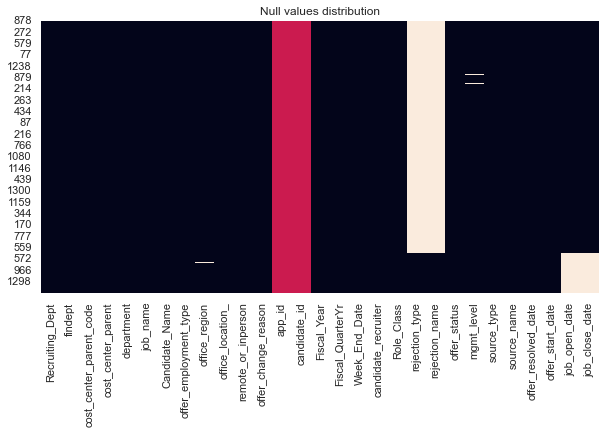

 Categorical   Numeric   NaN 


In [43]:
# Create dictionary with column types.
def recognize_column_type(dtf, col, max_cat=20):
    """Returns the type of a column"""
    
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

dic_cols = {col:recognize_column_type(data4, col, max_cat=20) for col in data4.columns}

# Visualize data
heatmap = data4.isnull()
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
        
sns.heatmap(heatmap, cbar=False).set_title('Null values distribution')
sns.set(rc={'figure.figsize':(10,5)});
plt.show()
print("\033[1;37;40m Categorical ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

There doesn't seem to be null values tied to dates. However, **apparently, `job_open_date` is null when there are values in `rejection_type`**. I wonder why that is.

Let's check for duplicates again but ignoring these columns. Perhaps whenever a candidate inputs a `rejection_type` a new row is created.

In [44]:
data.duplicated(['Recruiting_Dept', 'findept', 'cost_center_parent', 'department',
       'job_name', 'Candidate_Name', 'offer_employment_type', 'office_region',
       'office_location', 'offer_change_reason', 'app_id', 'candidate_id',
       'Fiscal_Year', 'Fiscal_QuarterYr', 'Week_End_Date',
       'candidate_recruiter', 'Role_Class', 'offer_status', 'mgmt_level', 'source_type', 'source_name',
       'offer_resolved_date', 'job_close_date']).value_counts()

False    1390
dtype: int64

No duplicates.

In [45]:
data4[data4["rejection_type"].notnull()].head(15)

,Recruiting_Dept,findept,cost_center_parent_code,cost_center_parent,department,job_name,Candidate_Name,offer_employment_type,office_region,office_location_,remote_or_inperson,offer_change_reason,app_id,candidate_id,Fiscal_Year,Fiscal_QuarterYr,Week_End_Date,candidate_recruiter,Role_Class,rejection_type,rejection_name,offer_status,mgmt_level,source_type,source_name,offer_resolved_date,offer_start_date,job_open_date,job_close_date
199,Tech,Engineering,10002,Software Engineering,Software Engineering,Senior Embedded Software Engineer -Application,Bryant McGee,Full-Time,USA,SF Bay Area,Remote,New Hire,275498473,253394075,2024,Q1,2023-02-04,Drew Johnson,Tech,They rejected us,They rejected us: Compensation misalignment,rejected,P40,Prospecting,LinkedIn (Prospecting),2023-02-01,2023-02-12,NaN,NaN
515,Tech,Engineering,10002,Software Engineering,Software Engineering,Software Engineer IV - SRE,Zev Adkins,Full-Time,USA,SF Bay Area,Remote,New Hire,273413002,251413671,2024,Q1,2023-02-04,Drew Garcia,Tech,They rejected us,They rejected us: Candidate withdrew,rejected,P30,Company marketing,Jobs page on your website,2023-02-02,2023-02-05,NaN,NaN
948,Corp,G&A,60004,Information Technology,Information Technology,Technology Project Manager,Sage Weber,Full-Time,USA,CO,Remote,New Hire,278259042,256073209,2024,Q1,2023-02-04,Casey Miller,Tech,They rejected us,They rejected us: Took another offer,rejected,P30,Referral,Referral,2023-02-01,2023-02-26,NaN,NaN
189,Tech,Engineering,10001,Hardware Engineering,Hardware Engineering,Senior Compliance Engineer,Rebekah Townsend,Full-Time,USA,SF Bay Area,Remote,New Hire,282290009,176417661,2024,Q1,2023-02-11,Hayden Rodriguez,Tech,We rejected them,None specified: Duplicate,rejected,P30,Third-party boards,LinkedIn (Ad Posting),2023-02-05,2023-02-26,NaN,NaN
238,EMEA,Engineering,10002,Software Engineering,Software Engineering,Senior Software Engineer II - SRE,Skyla Knox,Full-Time,EMEA,London,In-person,New Hire,267005312,245248695,2024,Q1,2023-02-11,Emily Thomas,Tech,They rejected us,They rejected us: Took another offer,rejected,P40,Prospecting,Otta,2023-02-07,2023-05-29,NaN,NaN
536,Corp,G&A,60007,Finance,Deal Desk,Deal Desk Analyst,Leonidas Rosales,Full-Time,USA,SF Bay Area,Remote,New Hire,279008704,256791277,2024,Q1,2023-02-11,Finley Jones,Non-Tech,They rejected us,They rejected us: Took another offer,rejected,P20,Prospecting,LinkedIn (Prospecting),2023-02-07,2023-02-20,NaN,NaN
786,Field Ops,Sales,20001,Sales,Sales Engineering,Inside Sales Engineer I,Amoura Wilkerson,Full-Time,USA,OK,Remote,New Hire,274455374,250620368,2024,Q1,2023-02-11,Alex Brown,Tech,We rejected them,None specified: Other (add notes),rejected,P20,Referral,Referral,2023-02-06,2023-02-05,NaN,NaN
1067,Tech,Engineering,10002,Software Engineering,Software Engineering,Senior Software Engineer I - Platform WebUX,Dustin Shaw,Full-Time,USA,MN,Remote,New Hire,277850377,255675142,2024,Q1,2023-02-11,Casey Miller,Tech,They rejected us,They rejected us: Took another offer,rejected,P50,Company marketing,Jobs page on your website,2023-02-06,2023-02-12,NaN,NaN
150,Field Ops,Sales,20001,Sales,Partner Sales,Partner Services Manager,Irene Liu,Full-Time,LATAM,Mexico,Remote,New Hire,278824496,256628264,2024,Q1,2023-02-18,Alex Brown,GTM,We rejected them,We rejected them: Compensation misalignment,rejected,P40,Third-party boards,LinkedIn (Ad Posting),2023-02-13,2023-02-12,NaN,NaN
167,Tech,Engineering,10002,Software Engineering,Software Engineering,"Senior Manager, Software Engineering - Fleet S...",Robin Dyer,Full-Time,USA,SF Bay Area,Remote,New Hire,280027861,257793173,2024,Q1,2023-02-18,Casey Garcia,Tech,They rejected us,They rejected us: Candidate withdrew,rejected,M60,Prospecting,LinkedIn (Prospecting),2023-02-13,2023-02-20,NaN,NaN


Could it be that the system automatically removed the open and close dates whevener a candidate rejects an offer?

In [37]:
data4[data4["rejection_type"].notnull()]["rejection_type"].value_counts()

They rejected us    151
We rejected them     52
Name: rejection_type, dtype: int64

No, there are records in which Samsara rejected the candidate and, still, open and close dates are missing. Also, I don't see any patterns in the rest of the columns.

**Therefore, it seems that whenever a rejection explanation is provided, the open and close dates are removed. We should be mindful of this if any KPI is based on the `job_open_date` or `job_close_date` fields**

### 1.3 Outliers

Since one of our KPIs is based on the dates, let's check the distribution of dates

In [75]:
# Transform `job_open_date` and `Week_End_Date` to date type
data5 = data4.copy()
data5["job_open_date"] = pd.to_datetime(data5["job_open_date"])
data5["Week_End_Date"] = pd.to_datetime(data5["Week_End_Date"])

In [68]:
# Count number of job_open_date's in the dataset
data_jobdate_count = data5.groupby("job_open_date", dropna=True).size().reset_index(name='date_count')
data_jobdate_count.head()

,job_open_date,date_count
0,2022-01-21,1
1,2022-04-12,1
2,2022-04-27,1
3,2022-04-28,1
4,2022-05-12,2


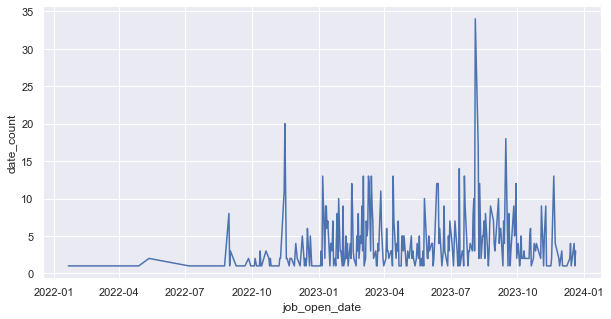

In [69]:
sns.lineplot(x='job_open_date', y='date_count', data=data_jobdate_count);

Let's repeat the analysis but for Week_End_Date

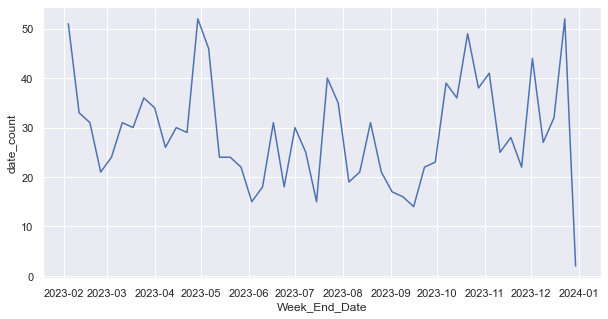

In [76]:
# Count number of job_open_date's in the dataset
data_weekdate_count = data5.groupby("Week_End_Date", dropna=True).size().reset_index(name='date_count')
data_weekdate_count.head()

#Plot
sns.lineplot(x='Week_End_Date', y='date_count', data=data_weekdate_count);

In sum, there doesn't seem to be any gaps in the dates.

## 2. Save clean dataset

In [77]:
data_final = data4.copy()
data_final.to_csv('Data/TakeHomeTest_Dataset_clean.csv', index=False)